# Robust regression

### Irving Gomez Mendez
### March 03, 2021

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform
import statsmodels.api as sm
from scipy.stats import t

In [2]:
alpha=0.05

nsample = 50
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, (x1-5)**2))
X = sm.add_constant(X)
sig = 0.3   # smaller error variance makes OLS<->RLM contrast bigger
beta = [5, 0.5, -0.0]
y_true2 = np.dot(X, beta)
y2 = y_true2 + sig*1. * np.random.normal(size=nsample)
y2[[39,41,43,45,48]] -= 5   # add some outliers (10% of nsample)

y2

array([ 4.84294798,  5.13424333,  5.69272301,  5.42954567,  5.27786057,
        6.53990425,  6.1465375 ,  5.98060303,  6.5381531 ,  6.95061178,
        7.10139401,  7.24903285,  7.42189647,  7.5636828 ,  7.4574505 ,
        7.92072006,  8.09263474,  8.41394967,  8.13001055,  8.48333447,
        9.23991577,  9.07742979,  9.7421257 ,  9.65212808,  9.86700076,
       10.05512441, 11.0408906 , 10.64763326, 10.58962808, 10.82658346,
       11.6143867 , 11.88848402, 11.16547566, 11.57935191, 11.81097946,
       11.39571663, 12.03780927, 12.38533122, 12.45191357,  8.24509966,
       13.8327427 ,  8.56325768, 13.81477101,  8.68646357, 13.74442649,
        9.21408008, 14.82766334, 14.56288826, 10.01854161, 14.86272671])

In [3]:
res = sm.OLS(y2, X).fit()
res.params

array([ 4.98002563,  0.52494319, -0.01261941])

In [4]:
res.scale

1.7907741696252413

In [5]:
res_predict = res.get_prediction(X)
summary_res_predict = res_predict.summary_frame(alpha=0.05)

#aux_t_pred = np.sqrt(res.scale*(1+np.diag(X @ np.linalg.inv(X.T @ X) @ X.T)))
#upp_pred = res.fittedvalues+t.ppf(1-alpha/2,nsample-3)*aux_t_pred
#low_pred = res.fittedvalues-t.ppf(1-alpha/2,nsample-3)*aux_t_pred

resrlm = sm.RLM(y2, X).fit()

In [6]:
resrlm.params

array([ 4.92125437e+00,  5.04086232e-01, -1.73787567e-03])

In [7]:
resrlm.scale

0.29780403057229327

In [8]:
aux_t_conf = np.sqrt(resrlm.scale*(np.diag(X @ np.linalg.inv(X.T @ X) @ X.T)))
rlm_upp_conf = resrlm.fittedvalues+t.ppf(1-alpha/2,nsample-3)*aux_t_conf
rlm_low_conf = resrlm.fittedvalues-t.ppf(1-alpha/2,nsample-3)*aux_t_conf

aux_t_pred = np.sqrt(resrlm.scale*(1+np.diag(X @ np.linalg.inv(X.T @ X) @ X.T)))
rlm_upp_pred = resrlm.fittedvalues+t.ppf(1-alpha/2,nsample-3)*aux_t_pred
rlm_low_pred = resrlm.fittedvalues-t.ppf(1-alpha/2,nsample-3)*aux_t_pred

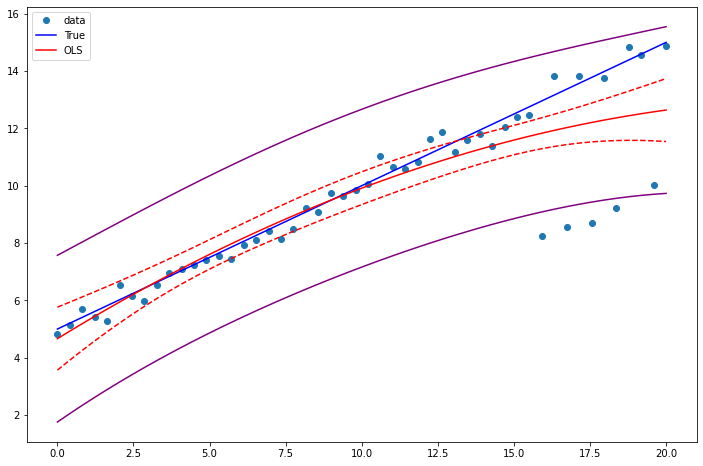

In [9]:
fig = plt.figure(figsize=(12,8))
plt.plot(x1, y2, 'o',label="data")
plt.plot(x1, y_true2, 'b', label="True")
plt.plot(x1, res.fittedvalues, 'r', label="OLS")
plt.plot(x1, summary_res_predict['mean_ci_lower'], 'r--')
plt.plot(x1, summary_res_predict['mean_ci_upper'], 'r--')
plt.plot(x1, summary_res_predict['obs_ci_lower'], 'purple')
plt.plot(x1, summary_res_predict['obs_ci_upper'], 'purple')
plt.legend(loc="best")

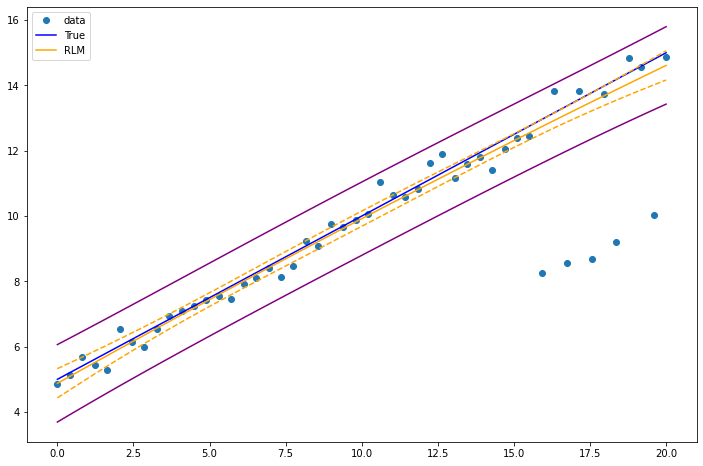

In [10]:
fig = plt.figure(figsize=(12,8))
plt.plot(x1, y2, 'o',label="data")
plt.plot(x1, y_true2, 'b', label="True")
plt.plot(x1, resrlm.fittedvalues, 'orange', label="RLM")
plt.plot(x1, rlm_low_conf, '--', color='orange')
plt.plot(x1, rlm_upp_conf, '--', color='orange')
plt.plot(x1, rlm_low_pred, 'purple')
plt.plot(x1, rlm_upp_pred, 'purple')
plt.legend(loc="best")
